# Digging Deeper with Scatter Plots

### Introduction

Now so far, we have mainly worked with categorical variables to describe a specific target.  

For example, we saw items like revenue broken down by categories of product or geography.  Oftentimes however, we may want continuous variables (like movie budget) to predict a continuous target (like movie revenue).

In this lesson, we'll see how we can work with continuous variables with scatter plots.

### Loading our data

In [15]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

In [17]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

> We can see that `fetch_california_housing` returns a dictionary, with various key value pairs.

In [8]:
ca_data = california['data']
ca_target = california['target']
feature_names = california['feature_names']
target_name = california['target_names'][0]

Then we can pull our the values of interest, like our data, and the feature_names.  We can assign that to a dataframe called X.

In [19]:
import pandas as pd
X = pd.DataFrame(data = ca_data, columns = feature_names)

In [20]:
X[:2]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22


And assign the target to a y value called target.

In [22]:
y = ca_target

y[:2]

array([4.526, 3.585])

> X is just a standard name for a matrix of features -- like our dataframe above.  And `y` is a typical variable name for a target column.  

> We'll combine the two in a moment.

In [24]:
# target_name

# 'MedHouseVal'

california_housing_df = X.assign(median_value = y)

In [25]:
california_housing_df[:2]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_value
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


1. Identify the grain of the data
    * Each row represents a different california district.
    
> You can view this in the description, which you can print by uncommenting and running the cell below.

In [28]:
# print(california['DESCR'][:1000])

2. Identify the target

* The target is the median value of a house in the district. 

### Plotting continuous variables

1. A single scatter plot

Ok, so now we can get to plotting developing a scatter plot.  We can plot let's say median income against our target variable, by using the `plot` method, specifying `kind = 'scatter'` and the `x` and `y` values.  The target should always be the `y` value.

<AxesSubplot: xlabel='MedInc', ylabel='median_value'>

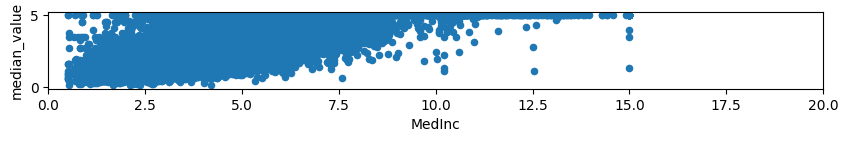

In [50]:
california_housing_df.plot(kind = 'scatter', x = 'MedInc', y = 'median_value', figsize = (10, 1), xlim =[0, 20])

So looking at the bottom range, there does appear to be an initial relationship between median income in a district and it's median value.  Notice there also appears to be an upper range on the value of a house, which is worth looking at further. 

Ok, so to plot our scatter plot, we just specify the `x` and `y` values,  and can also pass through arguments like the figsize and `xlim` for the range of x values.

### Comparing against categorical variables

If you think back to how we worked with categorical variables, we also produced a scatter plot there.

The main difference is that we first grouped together a value like Action movies and then plotted the average income of those movies, compared to Drama movies, etc.  With our continuous variables, where each input is a number, we can just plot each input value against the corresponding target value.

### Plotting multiple variables

We can use a loop to produce a series of scatter plots.

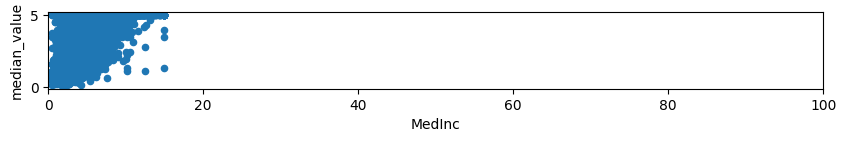

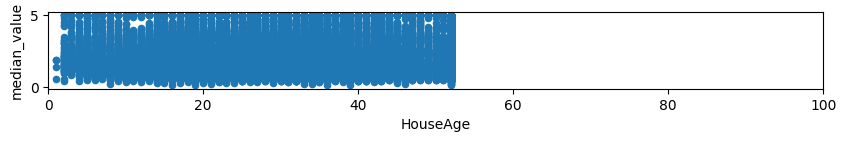

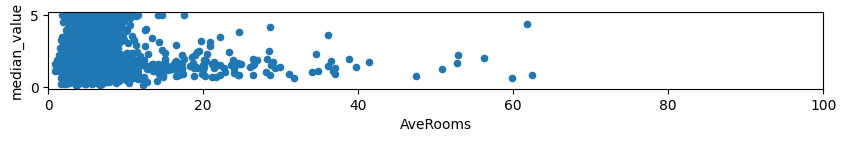

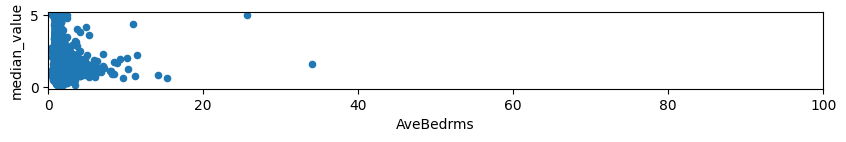

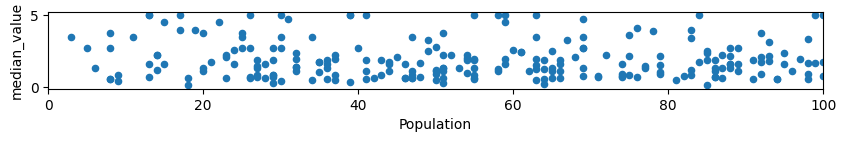

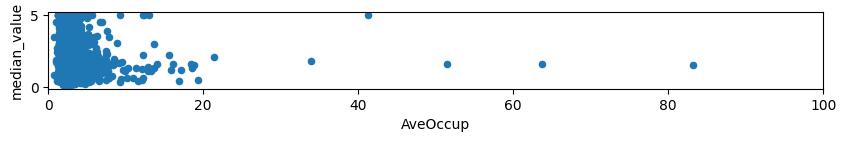

In [51]:
selected_cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
for selected_col in selected_cols:
    california_housing_df.plot(kind = 'scatter', x = selected_col, y = 'median_value', figsize = (10, 1), xlim =[0, 100])

One thing to note is that we should not turn off our brain completely when printing these plots.  For example, we would expect the price of a house to increase as the number of bedrooms increase - as it indicates a larger house.  So the lack of correlation could be from (1) the fact that this is the *average* number of bedrooms across a district, and (2) maybe bedrooms only increase the price up to a point (like 1 - 3 bedroom homes).  

> So let's change the range of the data to zoom in on this.

<AxesSubplot: xlabel='AveBedrms', ylabel='median_value'>

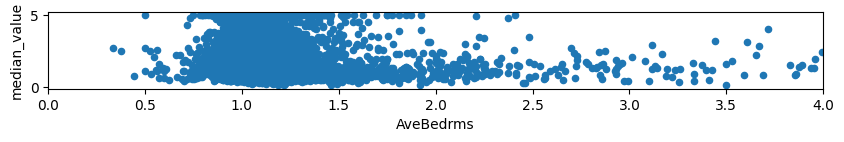

In [52]:
california_housing_df.plot(kind = 'scatter', x = 'AveBedrms', y = 'median_value', figsize = (10, 1), xlim =[0, 4])

Ok, so we actually see a price increase with 1 to 2 bedroom homes, which perhaps is because these are more likely to be in cities. 

> We would have to do more analysis to get a better idea.

### Summary

In this lesson, we saw how to quickly plot our continuous variables against our target variable.  We did so by looping through our data and using our target variable as the y variable, and passed through feature column names as the x variable.

In [ ]:
selected_cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
for selected_col in selected_cols:
    california_housing_df.plot(kind = 'scatter', x = selected_col, y = 'median_value', figsize = (10, 1), xlim =[0, 100])